## Objective: To construct a chart showing client revenues by country to answer the question:

#### 💡 Which countries generate the most revenue per customer, and how do they compare to others?

**This section imports all the required libraries and dependencies for the analysis.**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

**Make connection with DB**

In [9]:
conn = sqlite3.connect('Chinook_Sqlite.sqlite')
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con=conn)
print(tables)

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


**Create DataFrame for information from Tables: Customer and Invoice**

In [20]:
df = pd.read_sql('''SELECT c.Country, COUNT(DISTINCT c.CustomerId) AS CustomerCount, SUM(i.Total) AS TotalRevenue, 
SUM(i.Total) / COUNT(DISTINCT c.CustomerId) AS RevenuePerCustomer 
FROM Customer c JOIN Invoice i 
ON c.CustomerId = i.CustomerId 
GROUP BY c.Country 
ORDER BY RevenuePerCustomer DESC''', conn)
df

,Country,CustomerCount,TotalRevenue,RevenuePerCustomer
0,Chile,1,46.62,46.620000
1,Ireland,1,45.62,45.620000
2,Hungary,1,45.62,45.620000
3,Czech Republic,2,90.24,45.120000
4,Austria,1,42.62,42.620000
5,Finland,1,41.62,41.620000
6,Netherlands,1,40.62,40.620000
7,USA,13,523.06,40.235385
8,Norway,1,39.62,39.620000
9,Germany,4,156.48,39.120000


**Build a bar chart to compare the average check and a pie chart to compare total income across TOP-8 countries.**

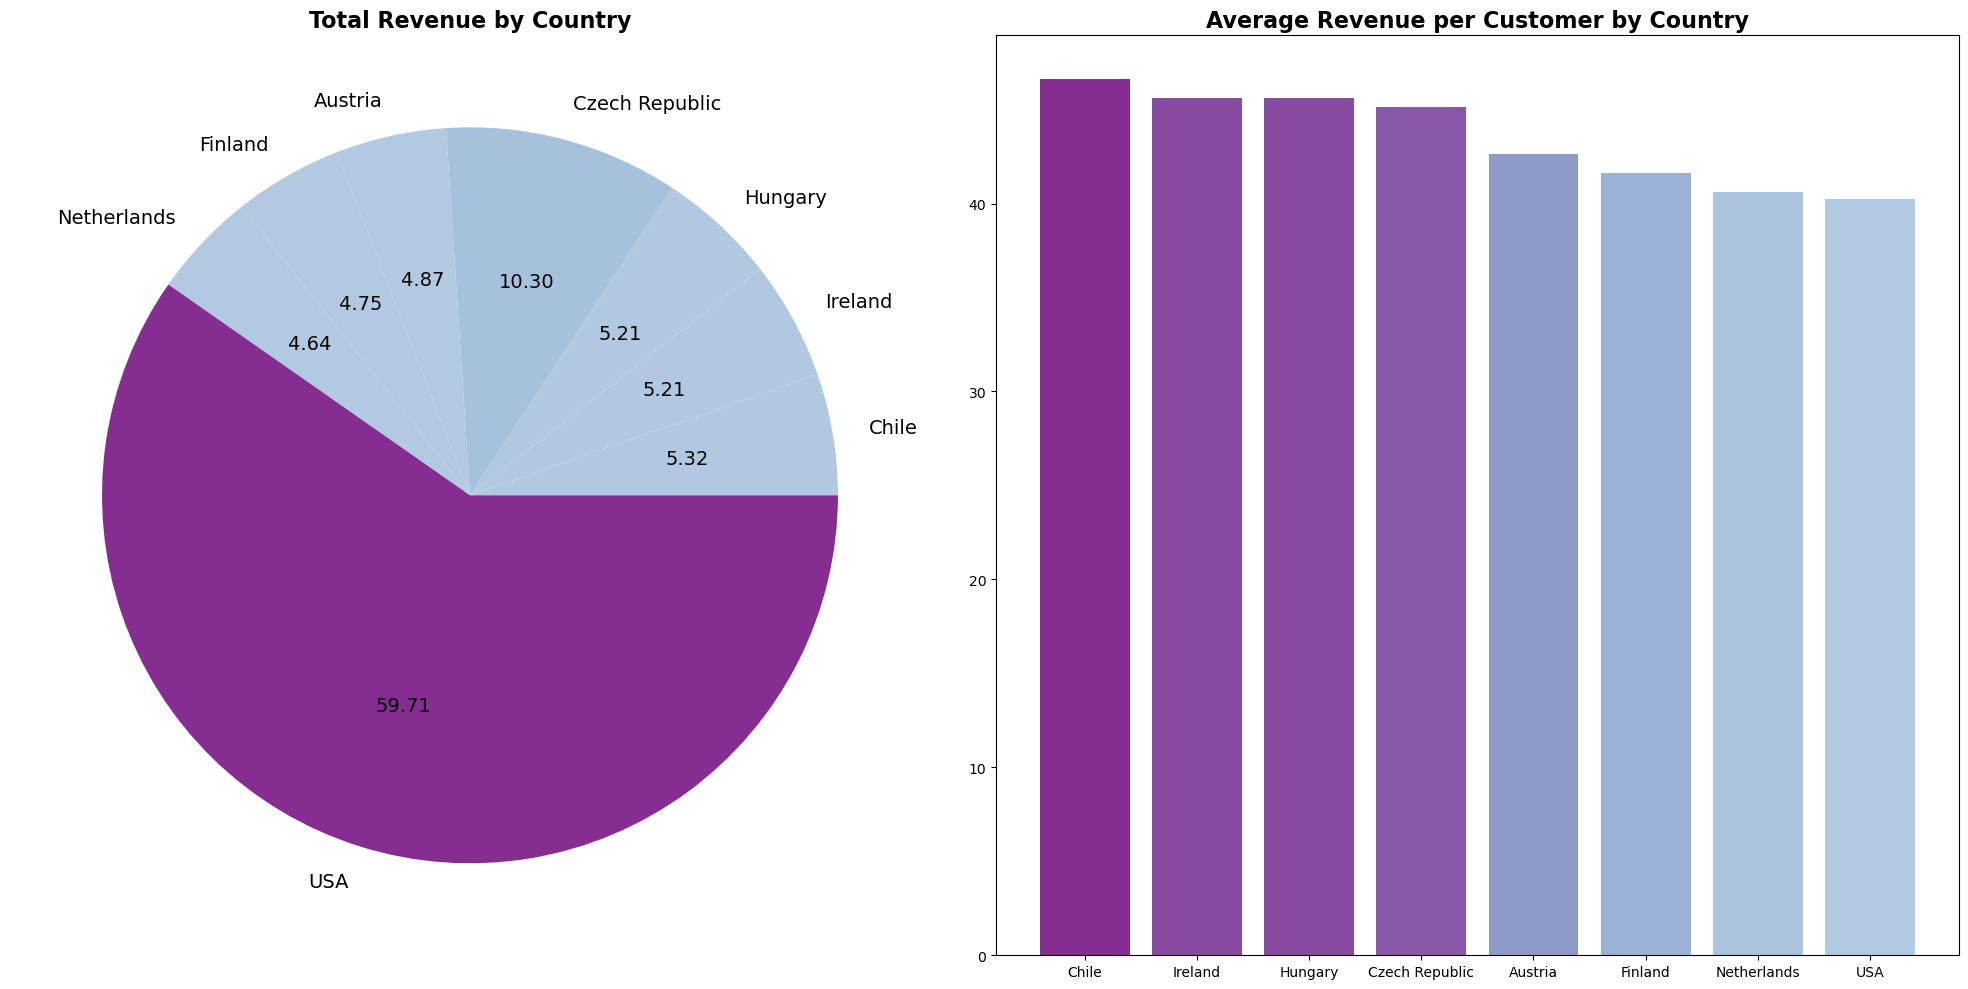

In [52]:
top8 = df.head(8)

fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)

cmap = plt.get_cmap('BuPu')

total_values = top8['TotalRevenue'].values
total_norm = (total_values - total_values.min()) / (total_values.max() - total_values.min())
total_color = cmap(total_norm * 0.5 + 0.3)

ax[0].pie(top8['TotalRevenue'], labels=top8['Country'], autopct='%.2f', colors=total_color, textprops={'fontsize': 14})
ax[0].set_title('Total Revenue by Country', fontsize=16, fontweight='bold')

rpc_values = top8['RevenuePerCustomer'].values
rpc_norm = (rpc_values - rpc_values.min()) / (rpc_values.max() - rpc_values.min())
rpc_color = cmap(rpc_norm * 0.5 + 0.3)

ax[1].bar(top8['Country'], top8['RevenuePerCustomer'], color=rpc_color)
ax[1].set_title('Average Revenue per Customer by Country', fontsize=16, fontweight='bold')

fig.tight_layout()

plt.show()